## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Unpacking the image files

reference: https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dicti = pickle.load(fo, encoding='bytes')
    return dicti

In [3]:
batch_1 = unpickle("cifar-10-batches-py/data_batch_1")

label= batch_1[b"labels"]
img = batch_1[b"data"]

batch_2 = unpickle("cifar-10-batches-py/data_batch_2")

label= label + batch_2[b"labels"]
img = np.vstack((img,batch_2[b"data"]))

batch_3 = unpickle("cifar-10-batches-py/data_batch_3")

label= label + batch_3[b"labels"]
img = np.vstack((img,batch_3[b"data"]))

batch_4 = unpickle("cifar-10-batches-py/data_batch_4")

label= label + batch_4[b"labels"]
img = np.vstack((img,batch_4[b"data"]))

batch_5 = unpickle("cifar-10-batches-py/data_batch_5")

label= label + batch_5[b"labels"]
img = np.vstack((img,batch_5[b"data"]))

## Information of the dataset

In [4]:
print(img.shape) #1000 rows, 3072 columns (32*32*3) RGB order / Row order

(50000, 3072)


## Plotting the images

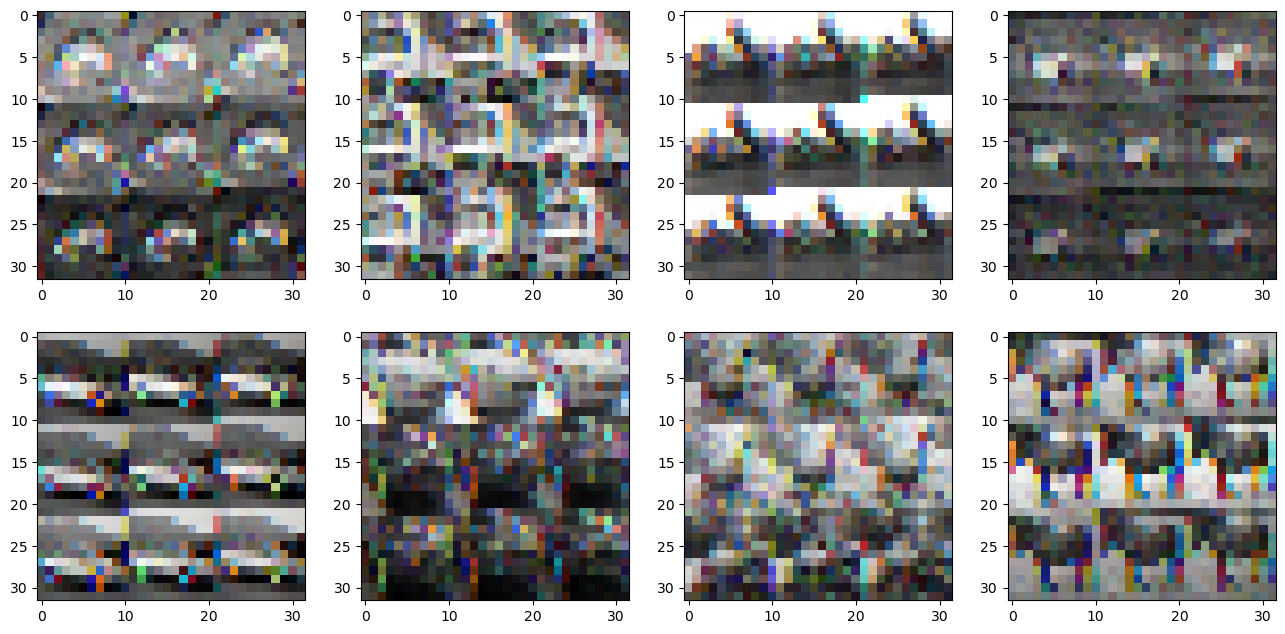

In [5]:
fig = plt.gcf()
fig.set_size_inches(16,16)
for index in range(8):
    sp = plt.subplot(4,4,index+1)
    plt.imshow(img[index].reshape(32,32,3), cmap='gray')

## Question 1.
#### Write a program that selects 1000 random images from the dataset, 
#### in which there are 100 images from each class.

### Making empty matrix for both images and their labels

In [6]:
train_x = np.zeros((1000,3072))
train_y = np.zeros((1,1000))

### Iterate through the whole label vector and append their index to their corresponding class

e.x.: if the label vector is sth like label=[0, 6, 2, 4]
    the first element represent class 6, and so its index which is 1 has to be added to key = 6(number of class)

In [7]:
labels = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
for i in range(5000):
            labels[label[i]].append(i)

In [ ]:
#### Randomly choose 100 images from the labels dictionary

In [8]:
import random
i = 0
for class_no in labels:
    while(i<=(100*class_no)+99):
        choise = random.sample(labels[class_no], k=1) # for choosing random samples (one sample)
        train_x[i] = img[choise[0]]    # find the corresponding image arry of chosen index(choise[0])
                                       # and add the array to train_x matrix --- i represent number of each image 
        train_y[0][i] = label[choise[0]] # find the corresponding label of chosen index(choise[0])
                                         # and add the label to train_y vector
        i += 1

train_x = train_x.T        # in order to be able to have the dot prodoction --- np.dot(w.T, train_x)

In [9]:
print("train_x.shape: ",train_x.shape)
print("train_y.shape: ",train_y.shape)

train_x.shape:  (3072, 1000)
train_y.shape:  (1, 1000)


In [10]:
#train_y[0,index]
#train_y

In [11]:
# train_y[:, index] ---> label of image=index

# m_train = train_x.shape[1]


In [12]:
# we need to center and standardize the dataset ---> because we have image arrays that their values are between 
# 0 to 255, we can easily devide the value by 255 and have a standardize dataset (center)

In [13]:
train_x = train_x/255

In [14]:
def initialize_parameters(dim, class_no):
    w = np.random.rand(dim, class_no)
    b = np.random.rand(class_no,1)
    return w, b    

In [15]:
w, b = initialize_parameters(train_x.shape[0], 10)
print("w: ", w)
print("b: ", b)

w:  [[0.58227305 0.8801012  0.31366388 ... 0.77042025 0.05039342 0.17735627]
 [0.21567645 0.33903425 0.78075702 ... 0.10327574 0.31358617 0.28231108]
 [0.10546551 0.98008258 0.08944804 ... 0.88278403 0.29549898 0.51686591]
 ...
 [0.22892265 0.17191318 0.65863743 ... 0.29909409 0.33026144 0.24341243]
 [0.34582006 0.5735799  0.86174547 ... 0.72033406 0.66490773 0.01265128]
 [0.37349872 0.59231755 0.19848182 ... 0.62032399 0.60604803 0.49878477]]
b:  [[0.75849029]
 [0.96557438]
 [0.78072519]
 [0.567617  ]
 [0.30697092]
 [0.9202471 ]
 [0.50788425]
 [0.20110697]
 [0.16801786]
 [0.40784315]]


In [16]:
def scores(w, b, x):
    score = np.dot(w.T, x) + b
    return score

In [17]:
score = scores(w, b, train_x)
print("score: ", score)
print(score.shape)

score:  [[ 577.12195929 1096.350093    822.61457088 ...  884.59814246
   584.68547184  913.4619674 ]
 [ 578.73451836 1102.15650955  825.03738581 ...  897.81519112
   580.10640724  908.3692898 ]
 [ 591.34327248 1129.82288017  846.10222316 ...  917.65154365
   595.5250938   923.89951146]
 ...
 [ 570.51487137 1092.02895468  817.79370197 ...  889.07398552
   577.17298792  896.03379849]
 [ 583.03378407 1097.63040301  827.15574689 ...  891.59920556
   581.05674072  902.15024509]
 [ 589.99277845 1117.7887431   845.74389864 ...  914.9619096
   598.23727209  925.99737463]]
(10, 1000)


In [18]:
def hinge_loss(score, y):
    margins = np.maximum(0, score-score[y]+1)
    margins[y] = 0
    svm_loss = np.sum(margins)
    return svm_loss

In [19]:
def hinge_loss_full(svm_loss, m_train):
    hinge_cost = (1/m_train)*(np.sum(svm_loss))
    return hinge_cost

In [20]:
svm_loss = np.zeros((1, 1000))
for i in range(1000):
    svm_loss[0][i] = hinge_loss(score.T[i], int(train_y[0,i]))
print("svm_loss:", svm_loss)

svm_loss: [[1.02003286e+02 1.92494650e+02 1.65588597e+02 1.10941150e+02
  1.45708983e+02 1.04851130e+02 1.33480128e+02 1.20139623e+02
  1.47459487e+02 1.44779737e+02 1.61712715e+02 2.18553746e+02
  1.91238137e+02 1.51346690e+02 1.60300241e+02 1.45648350e+02
  2.20894658e+02 1.57381278e+02 1.23380201e+02 1.74141221e+02
  1.66017299e+02 1.67103735e+02 1.91696905e+02 1.62509640e+02
  7.65507238e+01 1.93697274e+02 5.88496285e+01 1.28354865e+02
  1.44989202e+02 1.37643286e+02 2.11679393e+02 1.72570498e+02
  2.23259266e+02 2.18553746e+02 1.05814038e+02 1.47459487e+02
  1.85097970e+02 2.22369146e+02 1.24378372e+02 2.09421897e+02
  1.36030720e+02 2.08732133e+02 2.12732492e+02 2.03177670e+02
  6.30422001e+01 2.11657312e+02 1.66930728e+02 1.91072372e+02
  1.51484807e+02 1.79031982e+02 1.61712715e+02 1.43476596e+02
  1.56451249e+02 1.65923104e+02 2.07886050e+02 1.20139623e+02
  1.07922163e+02 2.02270229e+02 1.34006642e+02 2.57086616e+02
  1.46927116e+02 2.45340981e+02 2.01022865e+02 1.91225730e+0

In [21]:
hinge_cost = hinge_loss_full(svm_loss, m_train=1000)
print("hinge_cost: ", hinge_cost)

hinge_cost:  66.830273415167


In [22]:
def softmax(score, y):
    not_normal_prob = np.exp(score)
    normal_prob = not_normal_prob / (np.sum(not_normal_prob))
    cross_entropy_loss = -np.log(normal_prob[y])
    return cross_entropy_loss

In [23]:
def cross_entropy_loss_full(cross_entropy_loss, m_train=1000):
    cross_entropy_cost = (1/m_train) * np.sum(cross_entropy_loss)
    return cross_entropy_cost

In [24]:
cross_entropy_loss = np.zeros((1, 1000))
for i in range(1000):
    cross_entropy_loss[0][i] = softmax(score.T[i] - np.max(score.T[i]), int(train_y[0,i]))
print("cross_entropy_loss: ", cross_entropy_loss)

cross_entropy_loss:  [[2.17026836e+01 4.34887705e+01 3.62782005e+01 2.77914749e+01
  3.57432791e+01 2.07027795e+01 2.73483827e+01 2.67839625e+01
  3.33673166e+01 3.15555132e+01 3.83662644e+01 4.22700688e+01
  3.67847284e+01 3.20820248e+01 3.42676987e+01 2.89454741e+01
  4.39979004e+01 3.25098574e+01 2.81179830e+01 3.70262911e+01
  3.27272257e+01 3.57481218e+01 4.06466896e+01 3.11880318e+01
  2.14703342e+01 3.55741945e+01 1.78034790e+01 2.78836562e+01
  4.06569196e+01 3.41977859e+01 4.30128168e+01 3.87162906e+01
  4.82519464e+01 4.22700688e+01 2.22362980e+01 3.33673166e+01
  3.71001949e+01 5.04469860e+01 3.23006545e+01 4.30154786e+01
  2.97119794e+01 4.10434969e+01 4.34419169e+01 4.13249769e+01
  1.26497828e+01 4.05802218e+01 3.47476574e+01 4.20869486e+01
  3.14754271e+01 3.92173859e+01 3.83662644e+01 2.79773505e+01
  3.11215223e+01 4.16938826e+01 4.36929635e+01 2.67839625e+01
  1.90041498e+01 4.33540028e+01 2.51890288e+01 5.07732596e+01
  3.46977985e+01 4.69676264e+01 3.85710509e+01 3.

In [25]:
cross_entropy_cost = cross_entropy_loss_full(cross_entropy_loss, m_train=1000)
print("cross_entropy_cost: ", cross_entropy_cost)

cross_entropy_cost:  16.988617394392026


In [26]:
def model(train_x, train_y):
    
    m_train = train_x.shape[1]
    
    # initialize parameters --- w, b
    w, b = initialize_parameters(train_x.shape[0], 10)
    
    # computing score --- w.T*x+b
    score = scores(w, b, train_x)
    
    # hinge loss for every image (1, 1000)
    svm_loss = np.zeros((1, 1000))
    for i in range(1000):
        svm_loss[0][i] = hinge_loss(score.T[i], int(train_y[0,i]))
    
    # hinge cost ---- the hinge loss of all images
    hinge_cost = hinge_loss_full(svm_loss, m_train=1000)
    
    # softmax function + cross entropy loss --- for each image
    cross_entropy_loss = np.zeros((1, 1000))
    for i in range(1000):
        cross_entropy_loss[0][i] = softmax(score.T[i] - np.max(score.T[i]), int(train_y[0,i]))
        
    # cross entropy cost --- the loss of all images
    cross_entropy_cost = cross_entropy_loss_full(cross_entropy_loss, m_train=1000)
    
    

    return hinge_cost, cross_entropy_cost
    

In [27]:
model(train_x, train_y)

(43.05189276619103, 13.501698224893916)